In [14]:
import sys
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [15]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

In [16]:
from ml_models.pipeline_for_regression import run_model

model, X_train, df_stats, df_test = run_model('catboost', use_feature_engineering=True, use_bet_odds=True)

<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   venue                      63531 non-null  category
 1   config                     63531 non-null  category
 2   surface                    63531 non-null  category
 3   distance                   63531 non-null  category
 4   going                      63531 non-null  category
 5   horse_ratings              63531 non-null  category
 6   race_class                 63531 non-null  category
 7   horse_id                   63531 non-null  int64   
 8   horse_age                  63531 non-null  int64   
 9   horse_country              63531 non-null  category
 10  horse_type                 63531 non-null  category
 11  horse_rating               63531 non-null  category
 12  declared_weight            63531 non-null  float64 
 13  actual_weight              63531 non-

KeyboardInterrupt: 

Correlation matrix over X_train

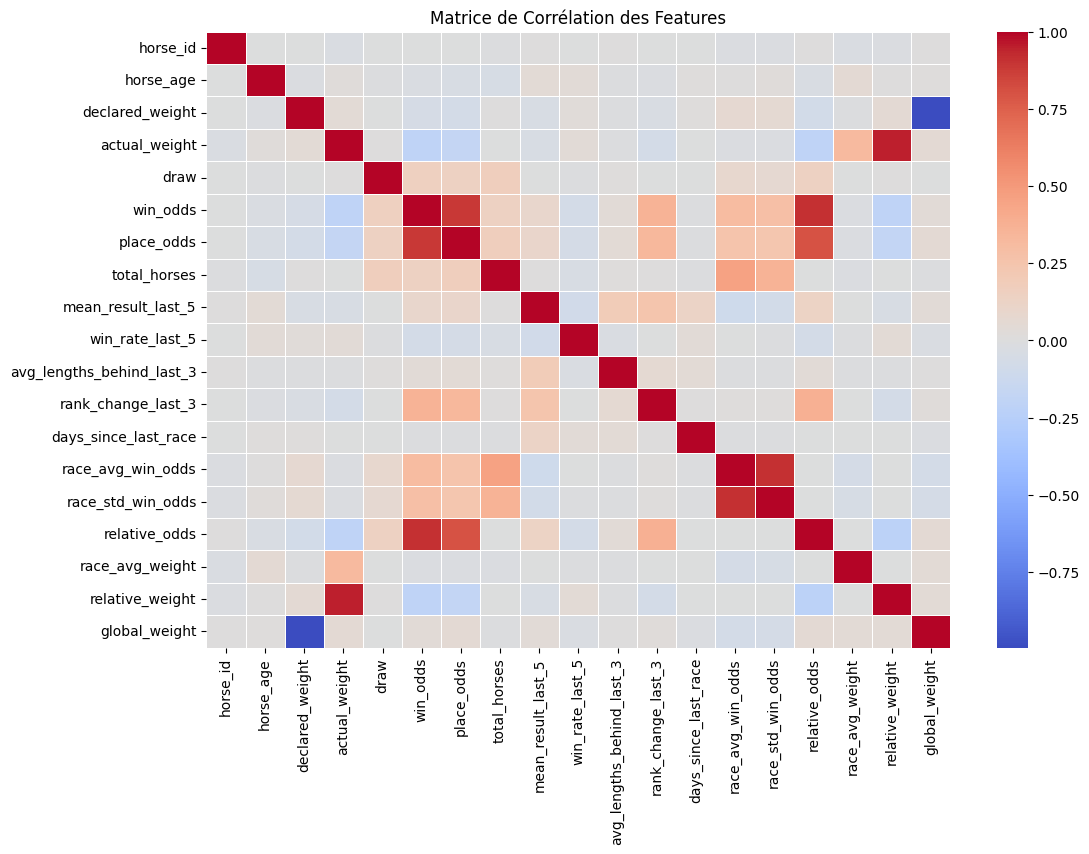

In [4]:
X_train_numeric = X_train.select_dtypes(include=["number"])

corr_matrix = X_train_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()


1. check les corrélations entre features
2. check la variance de la feature (si trop faible, inefficace)
3. check la performance si on l'enlève

Correlation Matrix over df_test (with target)

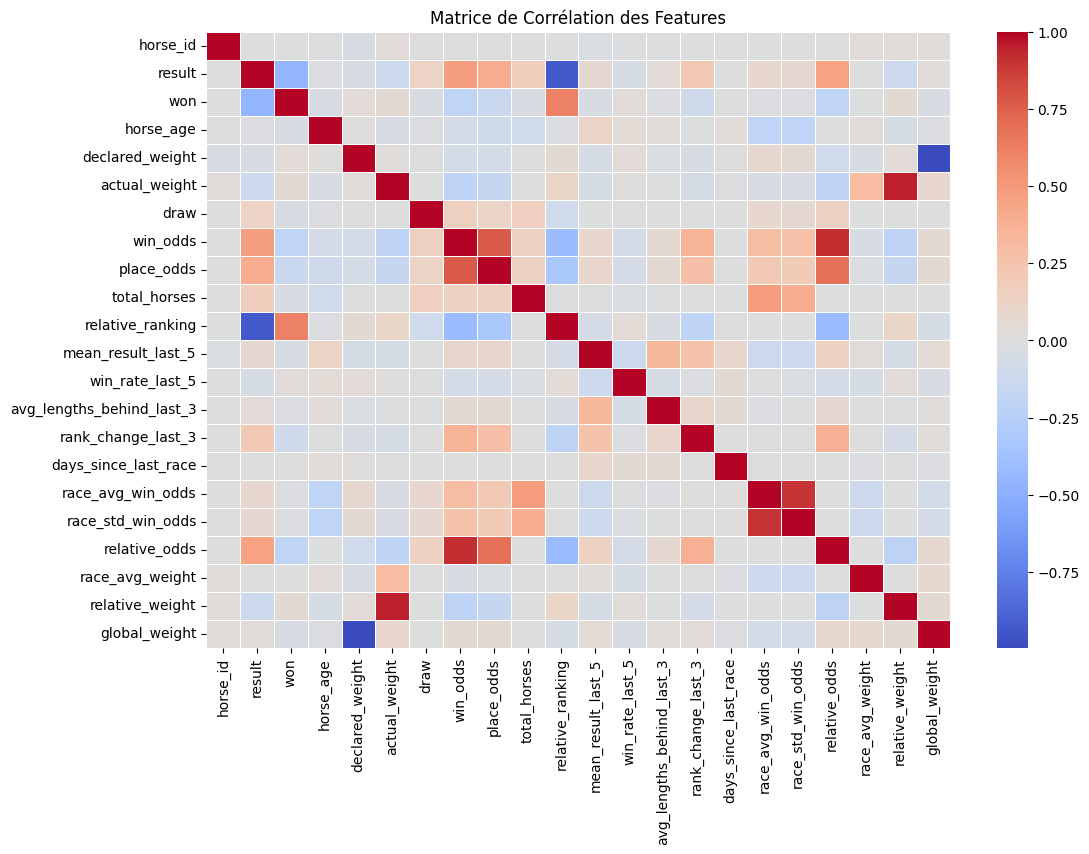

In [5]:
df_test_numeric = df_test.select_dtypes(include=["number"])

corr_matrix = df_test_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()


In [10]:
low_variance_features = X_train_numeric.var()[X_train_numeric.var() < 0.05].index.tolist()
print("Features avec très faible variance :", low_variance_features)


Features avec très faible variance : ['win_rate_last_5', 'relative_weight']


In [11]:
low_variance_features = df_test_numeric.var()[df_test_numeric.var() < 0.05].index.tolist()
print("Features avec très faible variance :", low_variance_features)

Features avec très faible variance : ['win_rate_last_5', 'relative_weight']


In [17]:
df_test_numeric = df_test.select_dtypes(include=["number"])
df_test_numeric.drop(columns=['relative_ranking','result'], inplace=True)

# Calcul de la corrélation avec "won"
correlations = df_test_numeric.corr()["won"].abs().sort_values(ascending=False)

# Sélection des 10 features les plus corrélées
top_10_correlated = correlations.drop("won").head(10)

# Affichage des résultats
print("🔝 Top 10 des variables les plus corrélées avec 'won':")
print(top_10_correlated)


🔝 Top 10 des variables les plus corrélées avec 'won':
relative_odds         0.196236
win_odds              0.193990
place_odds            0.135115
rank_change_last_3    0.101593
relative_weight       0.056513
actual_weight         0.053964
draw                  0.042680
mean_result_last_5    0.040641
declared_weight       0.039928
total_horses          0.035450
Name: won, dtype: float64
